In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cmasher as cmr

import sys
sys.path.insert(0,"/Users/z5278074/pierobon/jaxions/scripts")

from pyaxions import jaxions as pa

In [2]:
f = pa.paxion.load()
#f = pa.paxion.load("path/to/pout/folder")

Loading data from pout/m/
...
Last file loaded: pout/m/axion.m.00060


In [3]:
phase = pa.paxion.phase(f,0)      # pass file path and index
density = pa.paxion.density(f,0)
velocity = pa.paxion.velocity(f,0,method='rotated') 

# methods for the velocity: 'naive'   (gradient of phase, breaks down at pi)
#                           'full'    (gradients of real and imaginary, blows up at small energy density)
#                           'rotated' (default method: solves the naive problem at pi) 

Time: 50835.11901876182


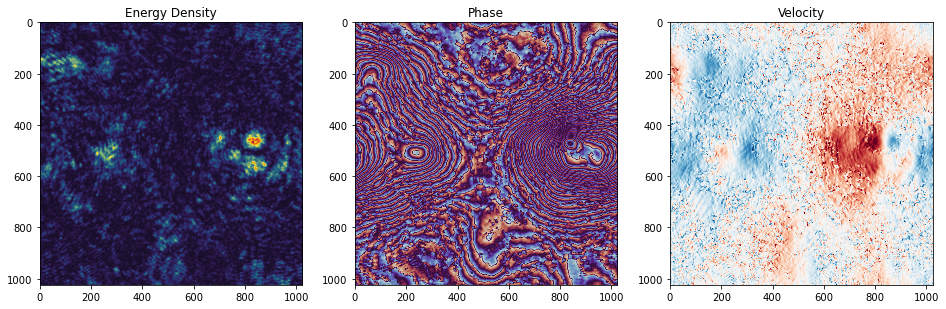

In [4]:
# Example plot

phase = [pa.paxion.phase(f,i) for i in range(len(f))]
density = [pa.paxion.density(f,i) for i in range(len(f))]
velocity = [pa.paxion.velocity(f,i) for i in range(len(f))]

index = 45
print("Time:",pa.gm(f[index],'z'))

fig,ax = plt.subplots(1,3,figsize=(16,5))

im = ax[0].imshow(density[index], cmap=cmr.pride)
ax[0].set_title('Energy Density')

im = ax[1].imshow(phase[index], cmap=cm.twilight,vmin=-np.pi,vmax=np.pi)
ax[1].set_title('Phase')

s = velocity[index].std()
im = ax[2].imshow(velocity[index], cmap=cm.RdBu,vmin=-2*s,vmax=2*s)
ax[2].set_title('Velocity')
plt.show()

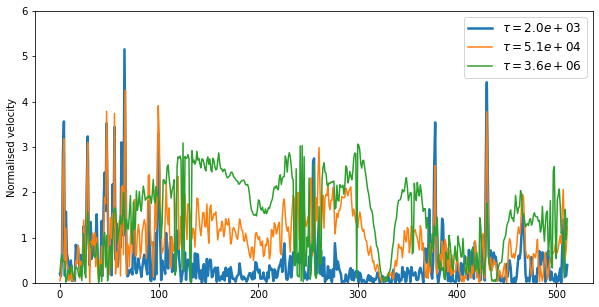

In [5]:
fig,ax = plt.subplots(1,figsize=(10,5))

col = cmr.pride(np.linspace(0.0, 0.85, 10))

ny = 450
nxmin = 512
nxmax = 1024

for i in [40,45,59]:
    
    phase = pa.paxion.phase(f,i)
    density = pa.paxion.density(f,i)
    velocity = pa.paxion.velocity(f,i,method='rotated')
    ct = pa.gm(f[i],'z')
    
    s = velocity.std()
    m = density.std()
    
    if i == 40:
        ax.plot(np.abs(velocity[ny,nxmin:nxmax])/s,label=r'$\tau=%.1e$'%ct,lw=2.5)
        
    else:
        ax.plot(np.abs(velocity[ny,nxmin:nxmax])/s,label=r'$\tau=%.1e$'%ct,alpha=1)
    
    #ax.plot(np.abs(density[ny,nxmin:nxmax])/m,color='k',alpha=0.05)
    ax.set_ylim(0,6)
    ax.set_ylabel("Normalised velocity")
    ax.legend(fontsize=12)